## Supervised Learning

### Classification and Regression

In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities.

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms.

### Generalization, Overfitting, and Underfitting

In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set. We want to build a model that is able to generalize as accurately as possible.

The trade-off between overfitting and underfitting is illustrated below.

<img src="https://amueller.github.io/ml-training-intro/slides/images/overfitting_underfitting_cartoon_full.png">

#### Relation of Model Complexity to Dataset Size

It’s important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. However, simply duplicating the same data points or collecting very similar data will not help.

Having more data and building appropriately more complex models can often work
wonders for supervised learning tasks.

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

Creating a sample data plot from the mglearn library

In [1]:
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\DD\Miniconda3\envs\python-ml-muller\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


An example of a synthetic two-class classification dataset is the forge dataset, which has two features. The following code creates a scatter plot (Figure 2-2) visualizing all of the data points in this dataset

In [2]:
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


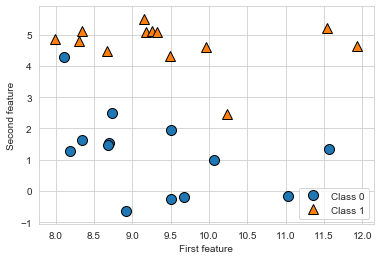

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

As you can see from X.shape, this dataset consists of 26 data points, with 2 features. 

To illustrate regression algorithms, we will use the synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model. The plot created here (Figure 2-3) shows the single feature on the x-axis and the regression target (the output) on the y-axis:

Text(0, 0.5, 'Target')

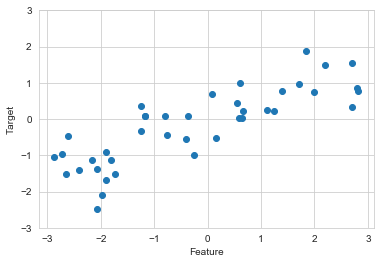

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

These are low-dimensional toy data sets. But we will complement these data sets with real world data provided by sklearn. The two data sets we will work on are 

- Wisconsin Breast Cancer dataset
- Boston Housing dataset

#### Wisconsin Breast Cancer dataset

Lets import both and first look at the breast cancer dataset.

In [5]:
from sklearn.datasets import load_breast_cancer, load_boston
cancer = load_breast_cancer()

In [6]:
print(f"cancer.keys(): {cancer.keys()}")

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Lets check the shape of the data.

In [7]:
print(f"Shape of Cancer data is {cancer['data'].shape}")

Shape of Cancer data is (569, 30)


The data has 569 observations and 30 features.

The cancer results are either `malignant` or `benign`

In [8]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

The data has used the below code for the target names.

In [9]:
for i in enumerate(cancer['target_names']):
    print(i)

(0, 'malignant')
(1, 'benign')


We can convert the data to a pandas dataframe for more information.

In [10]:
import pandas as pd
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

We can check all the feature names and the type of data.

In [11]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Add the result column to our data frame.

In [12]:
import numpy as np
cancer_df['result'] = cancer['target']
cancer_df['result'] = np.where(cancer_df['result'] == 0,'malignant','benign')

In [13]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


#### Boston Housing Dataset

Lets also build a data fram for the Boston Housing dataset.

In [14]:
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [15]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
print(f"Shape of Boston data is {boston_df.shape}")
print()
print(f"The data types for Boston data is\n{boston_df.dtypes}")

Shape of Boston data is (506, 13)

The data types for Boston data is
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


Add the target column to the data set. This data is the median value of a home in Boston area.

In [17]:
boston_df['median_value'] = boston['target']

In [18]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Before we work on this dataset, lets understand the various machine learning algorithms.

#### k-Nearest Neighbors (knn)

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the  raining dataset—its “nearest neighbors.”

##### k-Neighbors classification

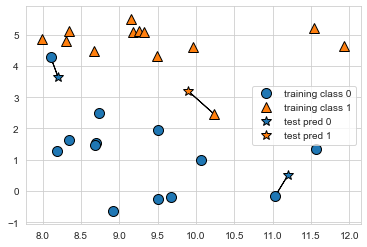

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In the above chart the new data is shown as a star. Based on the 1 neighbor parameter, the algorithm classifies the new data as either blue cirlce or orange triangle. 

We can change the parameter to `n_neighbors=3`. This will classify some data points differently than before.

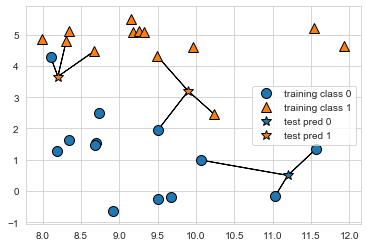

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

You can see that the prediction for the new data point at the top left is not the same as the prediction when we used only one neighbor.

Applying knn using the sklearn module

In [21]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
print(f"Test set prediction: {clf.predict(X_test)}")

Test set prediction: [1 0 1 0 1 0 0]


In [25]:
score = np.round(clf.score(X_test,y_test),2)

print(f"Test set accuracy: {score}")

Test set accuracy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset.

Plotting the descision boundary.

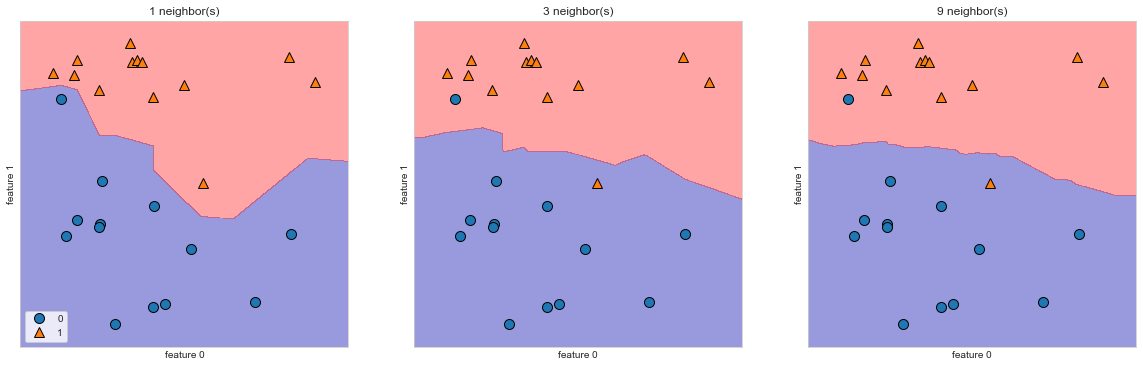

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset.

In [27]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


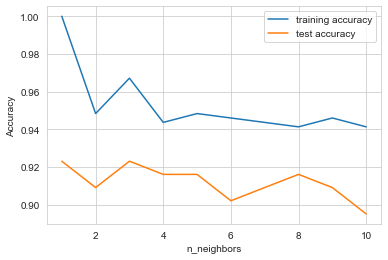

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.drop(columns=['result']),
                                                   cancer_df['result'],
                                                   random_state = 66)
# We will try 1 to 10 neighbors
neighbors_settings = range(1,11)

# Store our results
training_accuracy = []
test_accuracy = []

for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();



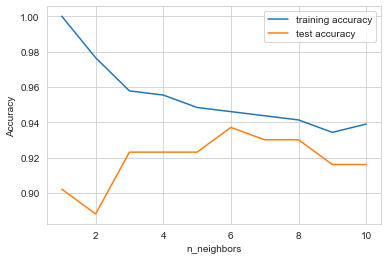

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify = cancer['target'],
                                                    random_state = 66)
# We will try 1 to 10 neighbors
neighbors_settings = range(1,11)

# Store our results
training_accuracy = []
test_accuracy = []

for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();



The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. 

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors.

##### k-neighbors regression

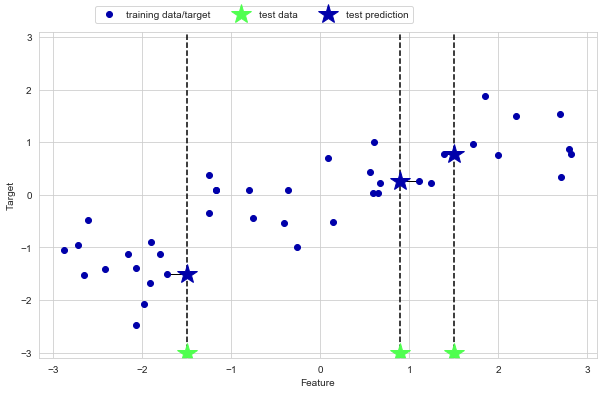

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

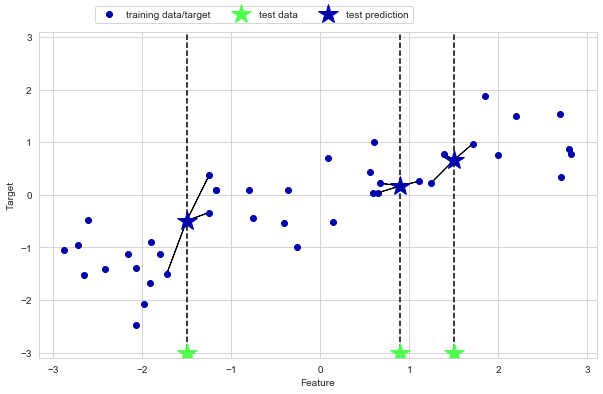

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using the single nearest neighbor, this time using the wave dataset.

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [33]:
print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
print(f"Test set R^2: {reg.score(X_test, y_test)}")

Test set R^2: 0.8344172446249604


#### Analyzing KNeighborsRegressor

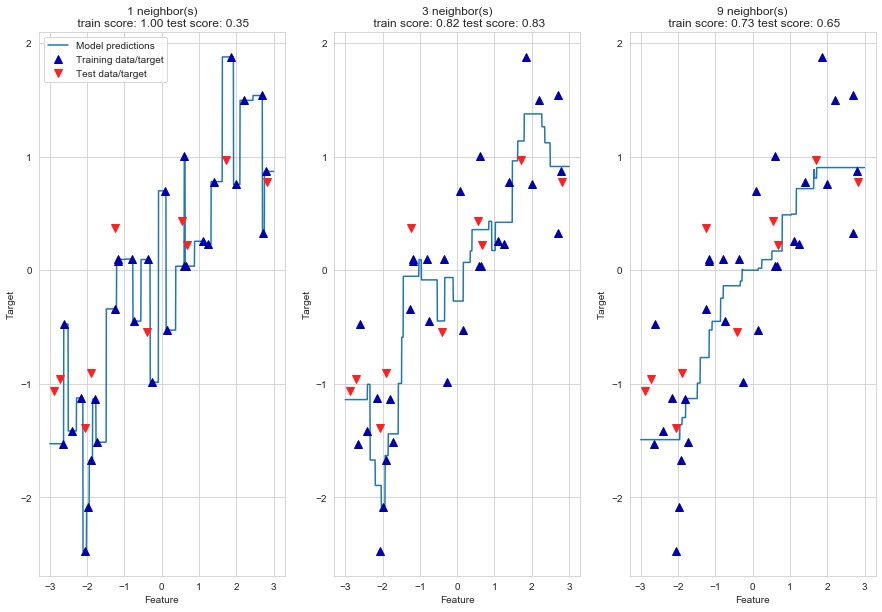

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

##### Strengths, weaknesses, and parameters

- Parameters
 - Few parameters, usually 3 or 5 neighbors work well
- Strengths
 - Easy to understand
 - Often gives resonable performance without much adjustement
 - Good baseline model
 - Its very fast to build (small dataset)
- Weakness
 - Can be slow if data is large
 - Does not perform well with many features
 - Does not perform well when features are mostly zero (sparse data)

#### Linear Models

Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a linear function of the input features, which we will explain shortly.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643">

w[0]: 0.393906  b: -0.031804


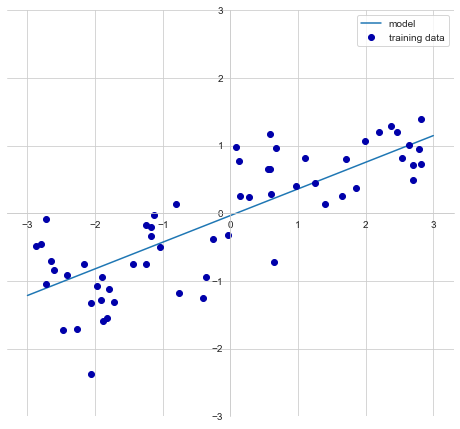

In [36]:
mglearn.plots.plot_linear_regression_wave()

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression.

In [37]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(f"The coefficient is: {lr.coef_}")

The coefficient is: [0.39390555]


In [39]:
print(f"The intercept is: {lr.intercept_}")

The intercept is: -0.031804343026759746


In [40]:
type(lr.coef_)

numpy.ndarray

In [41]:
type(lr.intercept_)

numpy.float64

In [42]:
print(f"Training set score {lr.score(X_train, y_train)}")

Training set score 0.6700890315075756


In [43]:
print(f"Testing set score {lr.score(X_test, y_test)}")

Testing set score 0.65933685968637


#### Linear Regression model on Boston Housing Data.

This is the extended dataset from the mglearn library.

Let’s take a look at how LinearRegression performs on a more complex dataset, like the Boston Housing dataset. Remember that this dataset has 506 samples and 105 derived features

In [44]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(f'Training set score: {np.round(lr.score(X_train, y_train) * 100,2)}%')

Training set score: 95.21%


In [47]:
print(f'Testing set score: {np.round(lr.score(X_test, y_test) * 100, 2)}%')

Testing set score: 60.75%


The large discrepancy between the performance on the training and the test set is a clear sign of overfitting, therefore we will find another model that allows us to control complexity. 

One of the most commonly used alternative to the standard linear regression is ridge regression.

#### Ridge 

Ridge Regression uses the same formula as linear regression. In ridge regression the coefficients are chosen not only so that they predict well on training data, but also fit the additional constraints.

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
print(f"Training set score: {np.round(ridge.score(X_train,y_train) * 100, 2)}%")

Training set score: 88.58%


In [50]:
print(f"Testing set score: {np.round(ridge.score(X_test,y_test) * 100, 2)}%")

Testing set score: 75.28%


As we can see the training score has reduced, but the test score has increased. With linear regression, we were overfitting our data. The Ridge model is more restrictive so we are less likely to overfit the data.

A less complex model mean worse performance on the training data, but better generalization. Since we are onlt interested in the generalization performance, we should choose the Ridge Model over Linear Regression Model.

In the previous example, we used the default parameter alpha=1.0.

Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [51]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print(f"Training set score: {np.round(ridge10.score(X_train,y_train) * 100, 2)}%")
print(f"Testing set score: {np.round(ridge10.score(X_test,y_test) * 100, 2)}%")

Training set score: 78.83%
Testing set score: 63.59%


In [52]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print(f"Training set score: {np.round(ridge01.score(X_train,y_train) * 100, 2)}%")
print(f"Testing set score: {np.round(ridge01.score(X_test,y_test) * 100, 2)}%")

Training set score: 92.82%
Testing set score: 77.22%


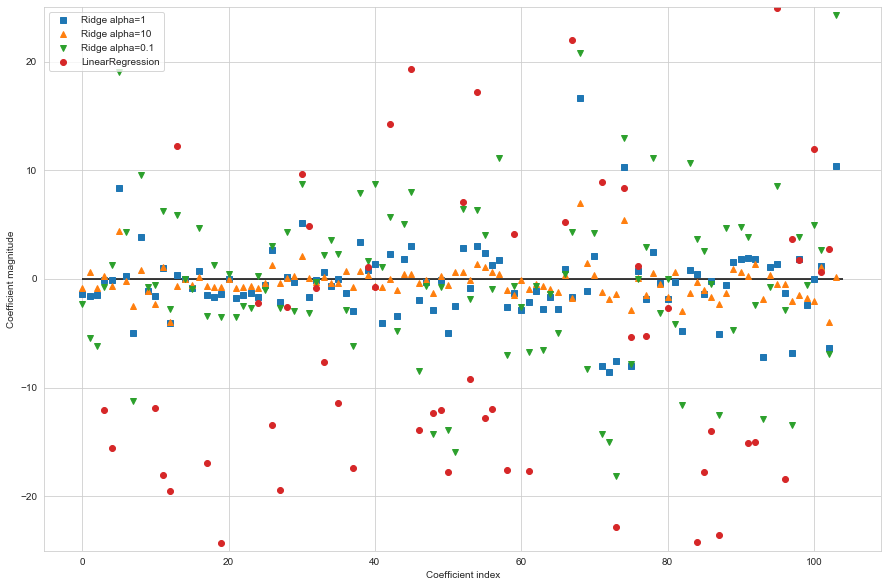

In [53]:
plt.figure(figsize=(15,10))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The main takeaway here is that for alpha=10, the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be alpha=0) are so large they are outside of the chart.

#### Lasso

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
print(f"Training set score: {np.round(lasso.score(X_train,y_train) * 100, 2)}%")
print(f"Testing set score: {np.round(lasso.score(X_test,y_test) * 100, 2)}%")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 29.32%
Testing set score: 20.94%
Number of features used: 4


Right out of the box, the Lasso score shows that we are under fitting the model. 

We have only used 4 out of the 105 features. Similar to Ridge, the Lasso also has a regularization parameter `alpha` that controls how strongly coefficients are pushed toward zero.

To reduce underfitting we can decrease the alpha. When we do this we also need to increase the number of iterations. We will increase it to 100000.

In [56]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha = 0.01, max_iter=100000)
lasso001.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
print(f"Training set score: {np.round(lasso001.score(X_train,y_train) * 100, 2)}%")
print(f"Testing set score: {np.round(lasso001.score(X_test,y_test) * 100, 2)}%")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 89.62%
Testing set score: 76.57%
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand. If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression: See Below

In [58]:
from sklearn.linear_model import Lasso

lasso00001 = Lasso(alpha = 0.0001, max_iter=100000)
lasso00001.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
print(f"Training set score: {np.round(lasso00001.score(X_train,y_train) * 100, 2)}%")
print(f"Testing set score: {np.round(lasso00001.score(X_test,y_test) * 100, 2)}%")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 95.07%
Testing set score: 64.37%
Number of features used: 96


Our Training score went up, but the test score has gone down. This shows we are overfitting the model to the data.

Text(0, 0.5, 'Coefficient magnitude')

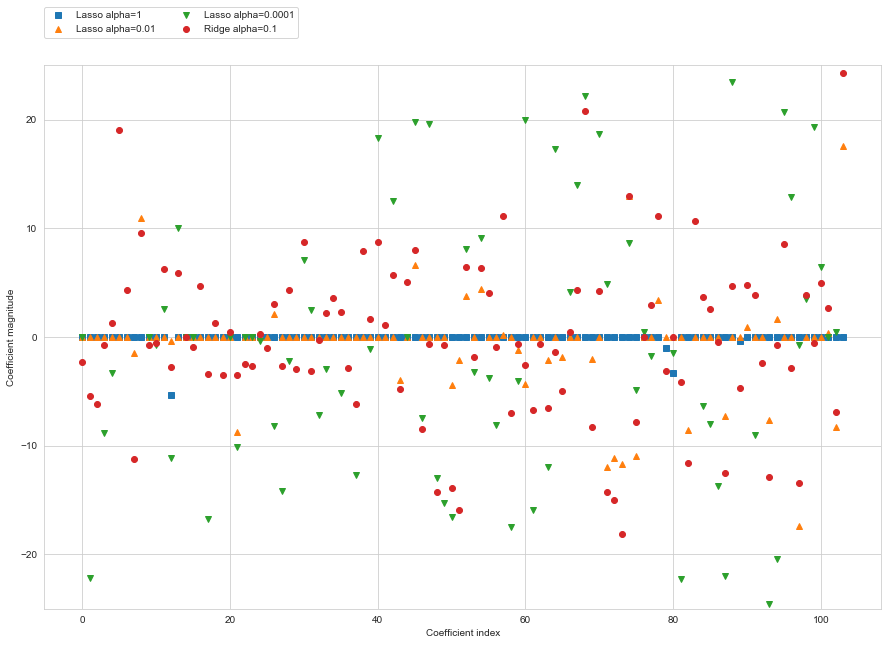

In [60]:
plt.figure(figsize=(15,10))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features.

#### Linear models for classification